__Sophia Thompson__
<br>
Date: Jan. 27, 2023
<br>
PHYS 2030 W23

__Rubric__ (100 points total):

- Part (a) /__30 points__
     
- Part (b) /__20 points__

- Part (c) /__50 points__


# <center><font color=#46769B>Exercise 8: Cosmic ray muons</font></center>

## <font color=#46769B>Introduction:</font>

The __muon__ (labeled $\mu$) is an elementary particle that is similar to the electron, except it is about 200 times heavier and is unstable to radioactive decay. The lifetime of the muon is $\tau = 2.2\times 10^{-6}$ seconds, which means that a typical muon survives only a small fraction of a second after being produced, ultimately decaying into an electron and neutrinos. (For the curious reader, more information about muons can be found [here](https://en.wikipedia.org/wiki/Muon).)

One natural source of muons is high-energy cosmic rays. The cosmic rays are fast-moving protons and heavier elements. When they smash into the Earth's atmosphere, the collisions produce showers of particles, including muons.

Despite their short lifetimes, many cosmic ray muons reach the surface of the Earth. In fact, many high-energy muons are able to penetrate a good distance into the Earth, which is the reason why some experiments need to be done at laboratories [deep underground](https://en.wikipedia.org/wiki/SNOLAB). On the other hand, cosmic ray muons can also be very useful, allowing us to see places that are inaccessible.
Measuring how cosmic ray muons are absorbed (similar to taking an x-ray) allowed researchers to discover new hidden spaces in the Great Pyramid of Giza, a technique known as [muon tomography](https://www.livescience.com/56510-photos-inside-great-pyramid-giza.html).

In this Exercise, you will perform a Monte Carlo simulation for cosmic ray muons. You will sample over four different variables for each muon, each with their own PDFs:
- *Decay time* $t$, sampled from an exponential PDF $P_t(t)$, as in Exercise 6.
- *Angle* $\theta$ that the muon is travelling with respect to the surface of the Earth, with PDF $P_\theta(\theta)$, as in Exercise 7.
- *Energy* $E$ of the muon, with PDF $P_E(E)$.
- *Height* $h$ above the Earth's surface where the muon is created, with PDF $P_h(h)$.

Using your samples, you will calculate the fraction of muons that reach the Earth's surface, as well as the distributions of $\theta$ and $E$ of those muons that reach the surface.

Our goals for this notebook are:
- Perform a multivariate Monte Carlo simulation, tying together all the knowledge gained so far in the course
- Gain further experience in the inverse CDF method

Required reading:
- *Lesson 3: Sampling from arbitrary distributions*

## <font color=#46769B>Exercise</font>

### <font color=#46769B>Part (a): Decay length</font>

The muon decay time $t$ is how long it takes for a given muon to decay. We sample $t$ from an exponential distribution

$$ P_t(t) = \left\{ \begin{array}{cc} \frac{1}{\tau} e^{-t/\tau} & {\rm for} \; t \ge 0 \\
0 & {\rm otherwise} \end{array} \right. $$

where $\tau = 2.2 \times 10^{-6}$ s is the muon lifetime. 

Cosmic ray muons are travelling close to the speed of light $c$, so we have to account for *time dilation*, as per Einstein's theory of Special Relativity. The decay time $t$ is the muon's decay time *at rest*, i.e., in the rest frame of the muon. To an observer at rest on the Earth, the muon's decay time will be $\gamma t$, where $\gamma$ is the [Lorentz factor](https://en.wikipedia.org/wiki/Lorentz_factor). Therefore, the distance travelled by the muon before decaying is $d = v\gamma t$, where $v$ is the muon's velocity.

Next, we sample the muon energy $E$ from a power-law distribution

$$P(E) = 
\left\{ \begin{array}{cc} E_m E^{-2} & {\rm for} \; E \ge E_m \\
0 & {\rm otherwise} \end{array} \right. \, .$$

Here, the muon energy $E$ is the total energy of the muon (kinetic energy + rest mass energy) and $E_m = m c^2$ is the (constant) rest mass energy of the muon.

Next, we use formulas from Special Relativity to evaluate the decay distance $d$ in terms of $E$ and $t$:
- The Lorentz factor is $\gamma = \frac{E}{E_m}$.
- The muon velocity is $v = c \sqrt{E^2 - E_m^2}/{E}$.

Combining everything, we have the distance travelled by the muon before it decays, in terms of $t$ and $E$

$$ d = c t \frac{\sqrt{E^2 - E_m^2}}{E_m} \, . \qquad {\rm (1)}$$

Use the following numerical constants:
- Muon rest mass energy: $E_m = mc^2 = 0.106 \; {\rm GeV}$. (It is customary to measure the rest mass energy in units of GeV (giga-electron volts), instead of SI units (Joules).)
- Speed of light: $c = 3 \times 10^5 \;  {\rm km/s}$.

Your tasks are as follows. Taking $N=10^6$:
- Generate $N$ samples for $t$ from $P_t(t)$ using the inverse CDF method.
- Generate $N$ samples $E$ from $P_E(E)$ using the inverse CDF method.
- Calculate $N$ samples for $d$ according to Eq. (1), in units of ${\rm km}$.
- Plot a histogram of your samples for $d$. Make your plot a log-log plot, and include a label to indicate your samples are for $d$.


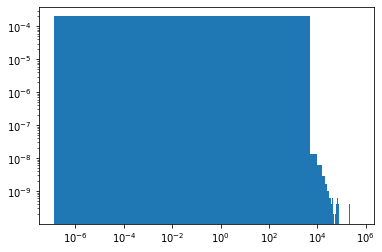

In [36]:
import numpy as np
import matplotlib.pyplot as plt

Em = 0.106
c = 3e5
num = 10**6

a = 1/2.2e-6
r = np.random.rand(num)
t_s = -1/a * np.log(1-r)

#CDF is -Em/E = r
#inverse CDF is the same
q = np.random.rand(num)
E_s = Em/q

d = c*t_s*np.sqrt(E_s**2 - Em**2)/Em

plt.hist(d, bins = 100, density = True, label = "distance")
plt.xscale('log')
plt.yscale('log')
plt.show()

## <font color=#46769B>Part (b): Distance to Earth</font>

Suppose a muon is created in a cosmic ray collision with angle $\theta$ and at height $h$ above the surface. How far does the muon need to travel before reaching the Earth?
- We will assume the muon has the same direction $\theta$ as the cosmic ray. 
- We will treat the Earth as approximately flat.

<div>
<img src="https://github.com/PHYS-2030-Computational-Methods/Lecture-notes/raw/main/figures/cosmic_rays.png" width="500">
</div>

Combining these assumptions, the distance from the collision to the surface of the Earth is

$$L = \frac{h}{\cos\theta} \, . \qquad (2)$$

We take a PDF for $\theta$ as in Exercise 7:

$$P_\theta(\theta) = \left\{ \begin{array}{cc} \sin 2\theta & {\rm for} \; 0 \le \theta \le \frac{\pi}{2} \\ 
0 & {\rm otherwise} \end{array} \right.  $$

We take a normal PDF for $h$: $P_h = \mathcal{N}(15 \; {\rm km},2\; {\rm km})$, i.e., a normal distribution of mean $\mu=15\; {\rm km}$ and width $\sigma=2 \; {\rm km}$. 

Your tasks are as follows, taking $N=10^6$:
- Generate $N$ samples for $\theta$ from $P_\theta$.
- Generate $N$ samples for $h$ from $P_h$.
- Obtain samples for $L$ (in $\rm{km}$).
- Plot a histogram of your samples for $L$. Make your plot a log-log plot, and include a label to indicate your samples are for $L$. On the same plot, include your histogram for $d$ that you made in Part (a).


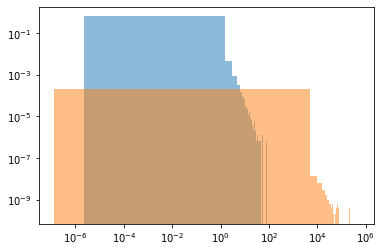

In [37]:
#as with Ex 7, the integral of sin(2theta) is -1/2 cos(2theta)
#the inverse of that then has theta = arccos(-2r)/2

r2 = np.random.uniform(-0.5, 0.5, num)
th_s = np.arccos(-2*r2)/2

mu = 15
sigma = 2
x = np.random.normal(mu, sigma, num)
h_s = 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-0.5*(x-mu)**2/sigma**2)

L = h_s/np.cos(th_s)

plt.hist(L, bins = 100, density = True, label = "L", alpha=0.5)
plt.hist(d, bins = 100, density = True, label = "distance", alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.show()

## <font color=#46769B>Part (c)</font>

Consider an observer on the surface of the Earth, who will detect the energy $E$ and angle $\theta$ of the muons. The goal here is to determine the distribution of $E$ and $\theta$ measured by the observer. Naturally, they are limited only to those muons that reach the surface.

In Parts (b) and (c), each sample represents a muon, where $d_i$ is the distance travelled before decaying and $L_i$ is the distance to the Earth's surface. The muon reaches the surface when $d_i > L_i$ and the muon decays before reaching the surface when $d_i < L_i$. 

Using your samples in Parts (a) and (b), your tasks are as follows:
- Compute and print the fraction of muons reaching the surface of the Earth
- Print the means and standard deviations of both $E$ and $\theta$ *for only muons that reach the surface*, and compare to the same means and standard deviations for *all samples*.
- Plot the histogram for $E$ *for only muons that reach the surface*. On the sample plot, show the histogram for $E$ for *all samples*, as well as the original PDF for $E$. Be sure that you include labels, your histograms are normalized (`density=True`) and have `alpha=0.5`, and use log-log for your axes.
- Plot the histogram for $\theta$ *for only muons that reach the surface*. On the sample plot, show the histogram for $\theta$ for *all samples*, as well as the original PDF for $\theta$. Be sure that you include labels, your histograms are normalized (`density=True`) and have `alpha=0.5`, and use linear-linear for your axes.


the fraction of muons reaching Earth is 76.19510000000001%.
the mean of the muons that reach the surface is 1.78610992780849 compared to 1.4077432645139594 for all samples.
the standard deviation of the muons that reach the surface is 93.0878484509666 compared to 81.25915638343666 for all samples.


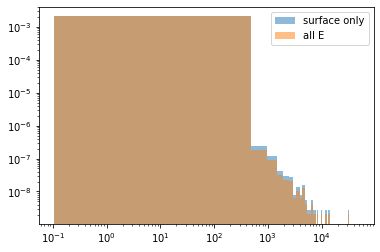

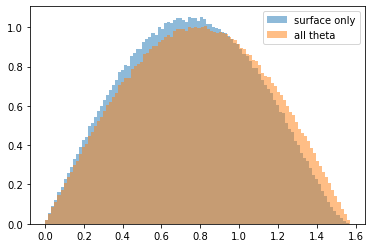

In [44]:
E_mean = np.mean(E_s)
E_st = np.std(E_s)
th_mean = np.std(th_s)
th_st = np.std(th_s)

fr = 0
Er = []
Th = []

for i in range(num):
  if d[i] >= L[i]:
    fr+=1
    Er.append(E_s[i])
    Th.append(th_s[i])

fraction = fr/num*100
Er_mean = np.mean(Er)
Er_st = np.std(Er)
Th_mean = np.mean(Th)
Th_st = np.std(Th)

print(f"the fraction of muons reaching Earth is {fraction}%.")
print(f"the mean of the muons that reach the surface is {Er_mean} compared to {E_mean} for all samples.")
print(f"the standard deviation of the muons that reach the surface is {Er_st} compared to {E_st} for all samples.")

plt.hist(Er, bins=100, density=True, label='surface only', alpha=0.5)
plt.hist(E_s, bins=100, density=True, label='all E', alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

plt.hist(Th, bins = 100, density=True, label = 'surface only', alpha=0.5)
plt.hist(th_s, bins = 100, density=True, label = 'all theta', alpha=0.5)
plt.legend()
plt.show()